*********************
This code is advanced 1-D TDSE 
*********************

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Double-well structure Potential Profile.

In [8]:
def Udouble(x,x1 = 0.5, x2 = 3.5, U1 = 10.0, U2 = 100.0):
    UU = np.where(abs(x)<=x1,U1,np.where(abs(x)>=x2,U2,0))
    return(UU)

Normal-distribution wavefunction

In [61]:
def Gauss(x, x0 = -2, alpha= 0.5):
    GG = np.exp(-np.power(x-x0,2)/np.power(alpha,2))/(np.sqrt(np.pi)*alpha/np.sqrt(2)) + 1j*0
    return(GG)

Generating arrays:

In [111]:
x = np.linspace(-4.0, 4.0, 1024)
U = Udouble(x)
WF= Gauss(x)

Controlling arrays

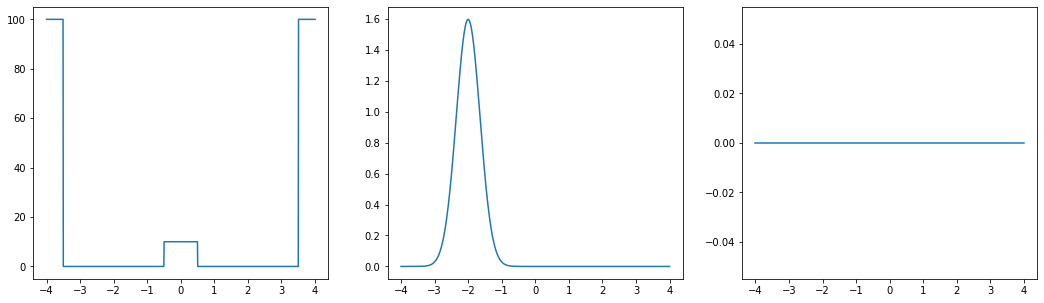

In [112]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

*******
Numerical method
*******

The rotation for the Hammiltonian part $H_1$. 

Rotation matrix:
$$
M_1 = \begin{pmatrix}
\cos\left(\frac{\tau}{12 h^2}\right) & -i \sin\left(\frac{\tau}{12 h^2}\right) \\
- i \sin\left(\frac{\tau}{12 h^2}\right) & \cos\left(\frac{\tau}{12 h^2}\right)
\end{pmatrix}
$$

Each next value of the wavefunction is produced as:
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+2} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\cos\left(\frac{\tau}{12 h^2}\right) & - i \sin\left(\frac{\tau}{12 h^2}\right) \\
- i \sin\left(\frac{\tau}{12 h^2}\right) & \cos\left(\frac{\tau}{12 h^2}\right)
\end{pmatrix} \times
\begin{pmatrix}
\Phi_{l} (t) \\
\Phi_{l+2} (t)
\end{pmatrix}
$$

Finally we have formula: 
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+2} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\Phi_{l} (t) \cos\left( \frac{\tau}{12 h^2} \right) - i \Phi_{l+2} (t) \sin\left( \frac{\tau}{12 h^2} \right) \\
\Phi_{l+2} (t) \cos\left( \frac{\tau}{12 h^2} \right) - i \Phi_{l} (t) \sin\left( \frac{\tau}{12 h^2} \right)
\end{pmatrix}
$$

where $l = {0,1,4,5,8,9,\dots}$. 

In [113]:
def H1rot(Wf,U,x,tau):
    h = x[1]-x[0]
    for i in range(int(len(U)/4)):
        P1 = Wf[4*i]
        P2 = Wf[4*i + 1]
        P3 = Wf[4*i + 2]
        P4 = Wf[4*i + 3]
        Wf[4*i] = P1*np.cos(tau/(12*h**2)) - 1j*P3*np.sin(tau/(12*h**2))
        Wf[4*i + 2] = P3*np.cos(tau/(12*h**2)) - 1j*P1*np.sin(tau/(12*h**2))
        Wf[4*i + 1] = P2*np.cos(tau/(12*h**2)) - 1j*P4*np.sin(tau/(12*h**2))
        Wf[4*i + 3] = P4*np.cos(tau/(12*h**2)) - 1j*P2*np.sin(tau/(12*h**2))

In [116]:
H1rot(WF,U,x,1e-4)

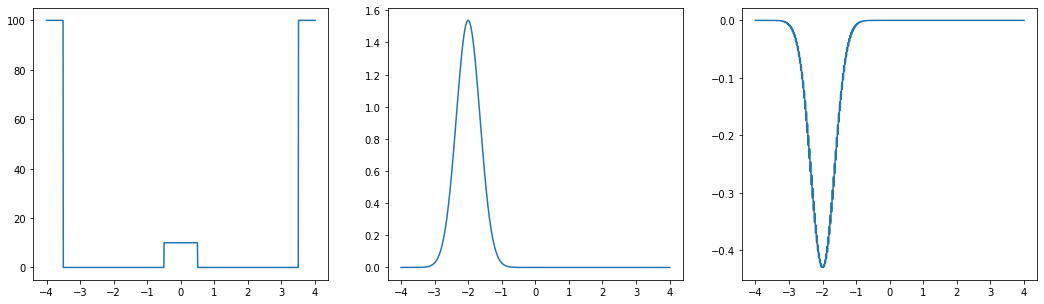

In [117]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

The rotation for the Hammiltonian part $H_2$. 

Rotation matrix:
$$
M_2 = \begin{pmatrix}
\cos\left(\frac{\tau}{12 h^2}\right) & - i \sin\left(\frac{\tau}{12 h^2}\right) \\
-i \sin\left(\frac{\tau}{12 h^2}\right) & \cos\left(\frac{\tau}{12 h^2}\right)
\end{pmatrix}
$$

Each next value of the wavefunction is produced as:
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+2} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\cos\left(\frac{\tau}{12 h^2}\right) & -i \sin\left(\frac{\tau}{12 h^2}\right) \\
-i \sin\left(\frac{\tau}{12 h^2}\right) & \cos\left(\frac{\tau}{12 h^2}\right)
\end{pmatrix} \times
\begin{pmatrix}
\Phi_{l} (t) \\
\Phi_{l+2} (t)
\end{pmatrix}
$$

Finally we have formula: 
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+2} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\Phi_{l} (t) \cos\left( \frac{\tau}{12 h^2} \right) - i \Phi_{l+2} (t) \sin\left( \frac{\tau}{12 h^2} \right) \\
\Phi_{l+2} (t) \cos\left( \frac{\tau}{12 h^2} \right) - i \Phi_{l} (t) \sin\left( \frac{\tau}{12 h^2} \right)
\end{pmatrix}
$$

where $l = {2,3,6,7,10,11,\dots}$. 

In [118]:
def H2rot(Wf,U,x,tau):
    h = x[1]-x[0]
    for i in range(int(len(U)/4)-1):
        #print(str(4*i + 2)+'-'+str(4*i + 4)+'\t'+str(4*i + 3)+'-'+str(4*i + 5))
        P1 = Wf[4*i + 2]
        P2 = Wf[4*i + 3]
        P3 = Wf[4*i + 4]
        P4 = Wf[4*i + 5]
        Wf[4*i + 2] = P1*np.cos(tau/(12*h**2)) - 1j*P3*np.sin(tau/(12*h**2))
        Wf[4*i + 4] = P3*np.cos(tau/(12*h**2)) - 1j*P1*np.sin(tau/(12*h**2))
        Wf[4*i + 3] = P2*np.cos(tau/(12*h**2)) - 1j*P4*np.sin(tau/(12*h**2))
        Wf[4*i + 5] = P4*np.cos(tau/(12*h**2)) - 1j*P2*np.sin(tau/(12*h**2))
        

In [119]:
H2rot(WF,U,x,1e-4)

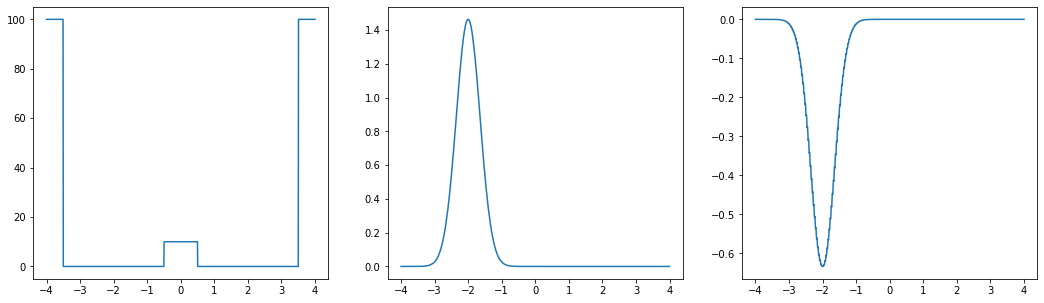

In [120]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

The rotation for the Hammiltonian part $H_3$. 

Rotation matrix:
$$
M_3 = \begin{pmatrix}
\cos\left(\frac{4 \tau}{3 h^2}\right) & i \sin\left(\frac{4 \tau}{3 h^2}\right) \\
i \sin\left(\frac{4 \tau}{3 h^2}\right) & \cos\left(\frac{4 \tau}{3 h^2}\right)
\end{pmatrix}
$$

Each next value of the wavefunction is produced as:
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+1} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\cos\left(\frac{4 \tau}{3 h^2}\right) & i \sin\left(\frac{4 \tau}{3 h^2}\right) \\
i \sin\left(\frac{4 \tau}{3 h^2}\right) & \cos\left(\frac{4 \tau}{3 h^2}\right)
\end{pmatrix} \times
\begin{pmatrix}
\Phi_{l} (t) \\
\Phi_{l+1} (t)
\end{pmatrix}
$$

Finally we have formula: 
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+1} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\Phi_{l} (t) \cos\left( \frac{4 \tau}{3 h^2} \right) + i \Phi_{l+1} (t) \sin\left( \frac{4 \tau}{3 h^2} \right) \\
\Phi_{l+1} (t) \cos\left( \frac{4 \tau}{3 h^2} \right) + i \Phi_{l} (t) \sin\left( \frac{4 \tau}{3 h^2} \right)
\end{pmatrix}
$$

where $l = {0,2,4,6,8,10,\dots}$. 

In [121]:
def H3rot(Wf,U,x,tau):
    h = x[1]-x[0]
    for i in range(int(len(U)/2)):
        #print(str(2*i)+'-'+str(2*i+1))
        P1 = Wf[2*i]
        P2 = Wf[2*i + 1]
        Wf[2*i] = P1*np.cos(4*tau/(3*h**2)) + 1j*P2*np.sin(4*tau/(3*h**2))
        Wf[2*i+1] = P2*np.cos(4*tau/(3*h**2)) + 1j*P1*np.sin(4*tau/(3*h**2))

In [122]:
H3rot(WF,U,x,1e-4)

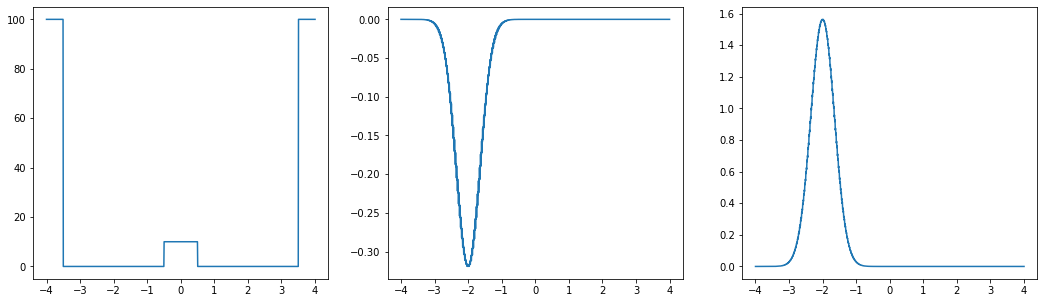

In [123]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

The rotation for the Hammiltonian part $H_4$. 

Rotation matrix:
$$
M_4 = \begin{pmatrix}
\cos\left(\frac{4 \tau}{3 h^2}\right) & i \sin\left(\frac{4 \tau}{3 h^2}\right) \\
i \sin\left(\frac{4 \tau}{3 h^2}\right) & \cos\left(\frac{4 \tau}{3 h^2}\right)
\end{pmatrix}
$$

Each next value of the wavefunction is produced as:
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+1} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\cos\left(\frac{4 \tau}{3 h^2}\right) & i \sin\left(\frac{4 \tau}{3 h^2}\right) \\
i \sin\left(\frac{4 \tau}{3 h^2}\right) & \cos\left(\frac{4 \tau}{3 h^2}\right)
\end{pmatrix} \times
\begin{pmatrix}
\Phi_{l} (t) \\
\Phi_{l+1} (t)
\end{pmatrix}
$$

Finally we have formula: 
$$
\begin{pmatrix}
\Phi_{l} (t+\Delta t) \\
\Phi_{l+1} (t+\Delta t)
\end{pmatrix} = 
\begin{pmatrix}
\Phi_{l} (t) \cos\left( \frac{4 \tau}{3 h^2} \right) + i \Phi_{l+1} (t) \sin\left( \frac{4 \tau}{3 h^2} \right) \\
\Phi_{l+1} (t) \cos\left( \frac{4 \tau}{3 h^2} \right) + i \Phi_{l} (t) \sin\left( \frac{4 \tau}{3 h^2} \right)
\end{pmatrix}
$$

where $l = {1,3,5,7,9,11,\dots}$. 

In [124]:
def H4rot(Wf,U,x,tau):
    h = x[1]-x[0]
    for i in range(int(len(U)/2)-1):
        #print(str(2*i+1)+'-'+str(2*i+2))
        P1 = Wf[2*i + 1]
        P2 = Wf[2*i + 2]
        Wf[2*i + 1] = P1*np.cos(4*tau/(3*h**2)) + 1j*P2*np.sin(4*tau/(3*h**2))
        Wf[2*i + 2] = P2*np.cos(4*tau/(3*h**2)) + 1j*P1*np.sin(4*tau/(3*h**2))

In [125]:
H4rot(WF,U,x,1e-4)

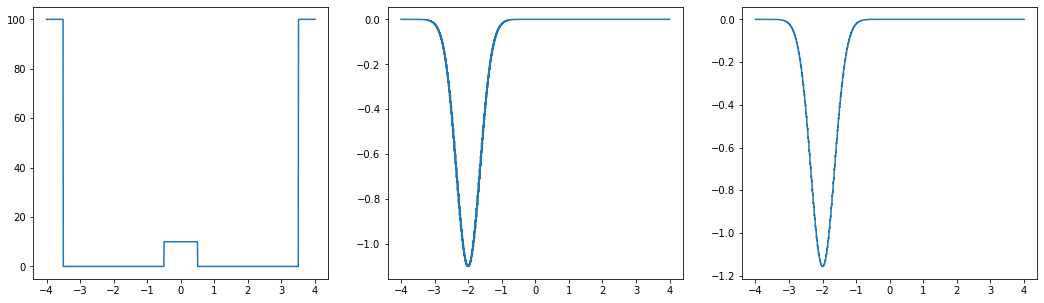

In [126]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

Finally the Hammiltonian part $H_5$ is just a multiplication: 
$$
\Phi_{l}(t + \Delta t) = \Phi_{l}(t) \cdot \exp\left[ -i\tau \left( \frac{5}{2 h^2} + V_l \right)\right] 
$$

In [127]:
def H5rot(Wf,U,x,tau):
    h = x[1]-x[0]
    for i in range(len(U)):
        Wf[i] = Wf[i]*np.exp(-1j*tau*(5/(2*h**2) + U[i]))

In [128]:
H5rot(WF,U,x,1e-4)

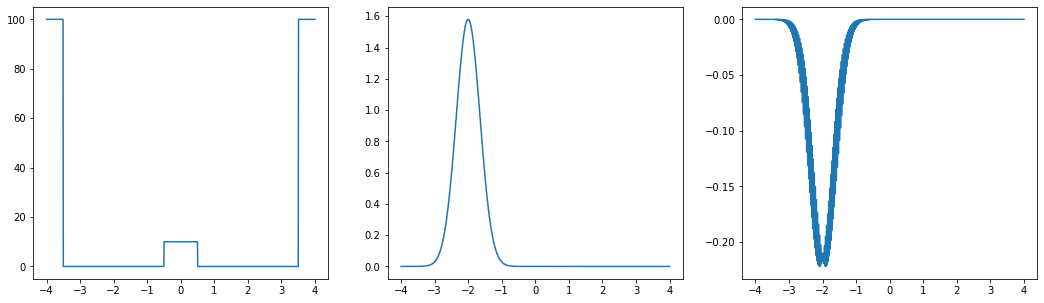

In [129]:
fig, axs = plt.subplots(ncols = 3, figsize=(18,5))
axs[0].plot(x,U)
axs[1].plot(x,np.real(WF))
axs[2].plot(x,np.imag(WF))
plt.show()

***********
Now into the loop:
**********

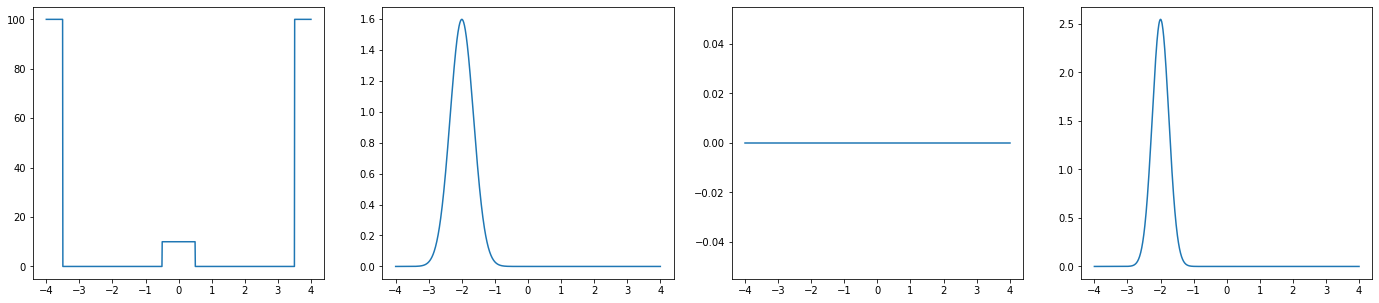

<Figure size 432x288 with 0 Axes>

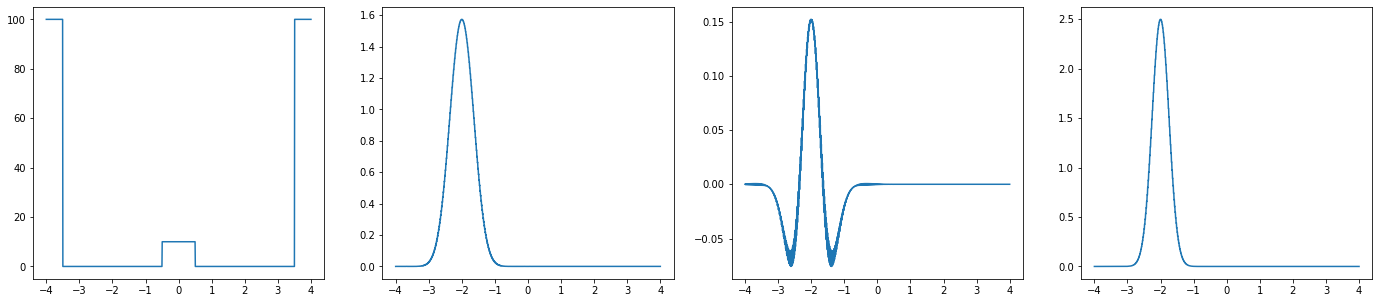

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [134]:
x = np.linspace(-4.0, 4.0, 1024)
U = Udouble(x)
WF= Gauss(x)

tau = 1e-4
for i in range(5000):
    if(i%100==0):
        fig, axs = plt.subplots(ncols = 4, figsize=(24,5))
        axs[0].plot(x,U)
        axs[1].plot(x,np.real(WF))
        axs[2].plot(x,np.imag(WF))
        axs[3].plot(x,np.power(np.abs(WF),2))
        plt.show()
        plt.clf()
    H1rot(WF,U,x,tau)
    H2rot(WF,U,x,tau)
    H3rot(WF,U,x,tau)
    H4rot(WF,U,x,tau)
    H5rot(WF,U,x,tau)
